# Proyecto Aurelion - IA Fundamentals - Spring 2 
## IBM - Guayerd 2025
## Análisis Exploratorio de Ventas 

Este notebook explora el flujo completo de análisis de datos comerciales mediante Python, con un modelo simulado que contiene 7 tablas relacionadas. El objetivo es consolidar los datos, analizarlos desde múltiples dimensiones y presentar resultados clave de forma visual.

In [2]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


## Paso 1: Carga de Datos

Importamos los 7 archivos de datos estructurados, proporcionados en formato `.xlsx`.

In [3]:
# Verificar o reemplazar las rutas de los archivos
df_clientes = pd.read_excel("../BD_Aurelion_expanded/clientes_expanded.xlsx")
df_productos = pd.read_excel("../BD_Aurelion_expanded/productos_expanded.xlsx")
df_ventas = pd.read_excel("../BD_Aurelion_expanded/ventas_expanded.xlsx")
df_detalle_ventas = pd.read_excel("../BD_Aurelion_expanded/detalle_ventas_expanded.xlsx")
df_sucursales = pd.read_excel("../BD_Aurelion_expanded/sucursales_expanded.xlsx")
df_vendedores = pd.read_excel("../BD_Aurelion_expanded/vendedores_expanded.xlsx")
df_medios_pago = pd.read_excel("../BD_Aurelion_expanded/medios_pago_expanded.xlsx")

print("Tablas cargadas correctamente.")

Tablas cargadas correctamente.


## Paso 2: Exploración y Validación Inicial

Revisamos estructura, nulos y tipos de datos para cada DataFrame.


In [4]:
datasets = {
    'clientes': df_clientes,
    'productos': df_productos,
    'ventas': df_ventas,
    'detalle_ventas': df_detalle_ventas,
    'sucursales': df_sucursales,
    'vendedores': df_vendedores,
    'medios_pago': df_medios_pago
}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(df.info())
    print(df.isnull().sum())


--- CLIENTES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_cliente           100 non-null    int64         
 1   nombre_cliente       100 non-null    object        
 2   email                100 non-null    object        
 3   ciudad               100 non-null    object        
 4   fecha_alta           100 non-null    datetime64[ns]
 5   genero               100 non-null    object        
 6   edad_rango           100 non-null    object        
 7   activo_como_cliente  100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ KB
None
id_cliente             0
nombre_cliente         0
email                  0
ciudad                 0
fecha_alta             0
genero                 0
edad_rango             0
activo_como_cliente    0
dtype: int64

--- PRODUCTO

## Paso 3: Limpieza y Conversión de Fechas

Convertimos campos de fecha y revisamos integridad.

In [5]:
df_clientes["fecha_alta"] = pd.to_datetime(df_clientes["fecha_alta"])
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])
df_vendedores["fecha_ingreso"] = pd.to_datetime(df_vendedores["fecha_ingreso"])
print("Fechas convertidas correctamente.")

Fechas convertidas correctamente.


## Paso 4: Unificación de Tablas

Unimos las tablas según claves foráneas para construir un DataFrame maestro `df_master`.

In [6]:
# 1. Unimos detalle con productos
dv_prod = df_detalle_ventas.merge(df_productos, on='id_producto', how='left')

# 2. Unimos con venta (encabezado)
ventas_detalle = dv_prod.merge(df_ventas, on='id_venta', how='left')

# 3. Unimos con clientes
completo_clientes = ventas_detalle.merge(df_clientes, on='id_cliente', how='left')

# 4. Unimos con sucursales
completo_sucursal = completo_clientes.merge(df_sucursales, on='id_sucursal', how='left')

# 5. Unimos con vendedores
completo_vendedor = completo_sucursal.merge(df_vendedores, on='id_vendedor', how='left')

# 6. Unimos con medios de pago
df_master = completo_vendedor.merge(df_medios_pago, on='id_medio_pago', how='left')

print("Unión de tablas realizada correctamente.")
df_master.head()
#df_master.shape

Unión de tablas realizada correctamente.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr


## Paso 5: Ingeniería de Características

Creamos columnas adicionales como año, mes, día de la semana, y monto final con descuentos.

In [7]:
df_master["año"] = df_master["fecha"].dt.year
df_master["mes"] = df_master["fecha"].dt.month
df_master["dia_nombre"] = df_master["fecha"].dt.day_name()
# Corregimos el cálculo del descuento_pct dividiendo por 100
df_master["descuento_pct"] = df_master["descuento_aplicado_pct"].fillna(0) / 100
df_master["monto_final"] = df_master["subtotal"] - (df_master["subtotal"] * df_master["descuento_pct"])

print("Columnas nuevas generadas.")
display(df_master[['fecha', 'año', 'mes', 'dia_nombre', 'descuento_aplicado_pct', 'descuento_pct', 'subtotal', 'monto_final']].head())

Columnas nuevas generadas.


,fecha,año,mes,dia_nombre,descuento_aplicado_pct,descuento_pct,subtotal,monto_final
0,2023-01-02,2023,1,Monday,0,0.0,29.02,29.02
1,2023-01-03,2023,1,Tuesday,0,0.0,119.70,119.70
2,2023-01-03,2023,1,Tuesday,0,0.0,23.45,23.45
3,2023-01-03,2023,1,Tuesday,0,0.0,81.22,81.22
4,2023-01-03,2023,1,Tuesday,0,0.0,20.69,20.69


## Paso 6: Análisis de Métricas Relevantes

A continuación realizamos distintos análisis para responder preguntas clave del negocio.

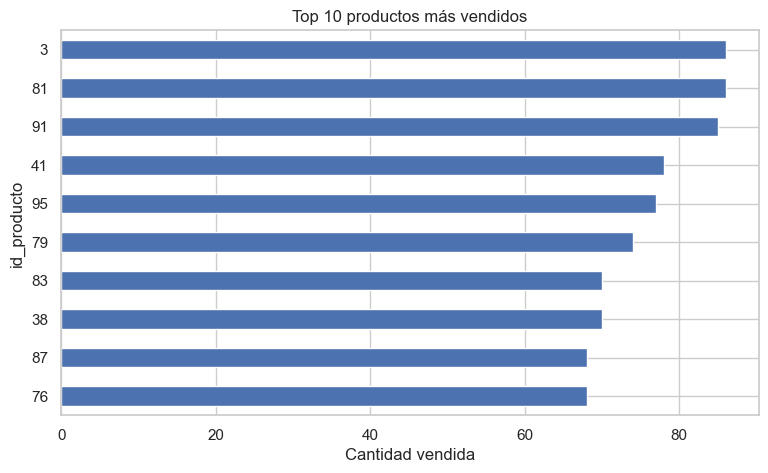

Productos más vendidos:
3 - Sprite 1.5L - 86
81 - Aceitunas Verdes 200g - 86
91 - Desodorante Ambiente Aerosol - 85
41 - Aceite de Girasol 900ml - 78
95 - Jabón de Tocador x3 - 77
79 - Hamburguesas Congeladas x4 - 74
83 - Queso Untable 190g - 70
38 - Harina Leudante 1kg - 70
87 - Detergente Ropa Color 800g - 68
76 - Pizza Congelada Muzzarella - 68


In [8]:
#Productos más vendidos
# Agrupamos por id_producto y sumamos las cantidades
top_productos = df_master.groupby("id_producto")["cantidad"].sum().sort_values(ascending=False).head(10)
# Generamos la gráfica
top_productos.plot(kind="barh", title="Top 10 productos más vendidos", figsize=(9,5))
plt.xlabel("Cantidad vendida")
plt.gca().invert_yaxis()
plt.show()

# Obtenemos los nombres de los productos
productos_dict = df_productos.set_index("id_producto")["nombre_producto"].to_dict()
# Generamos el print con id_producto, nombre_producto y cantidad
print("Productos más vendidos:")
for id_producto, cantidad in top_productos.items():
    nombre_producto = productos_dict.get(id_producto, "Desconocido")
    print(f"{id_producto} - {nombre_producto} - {cantidad}")

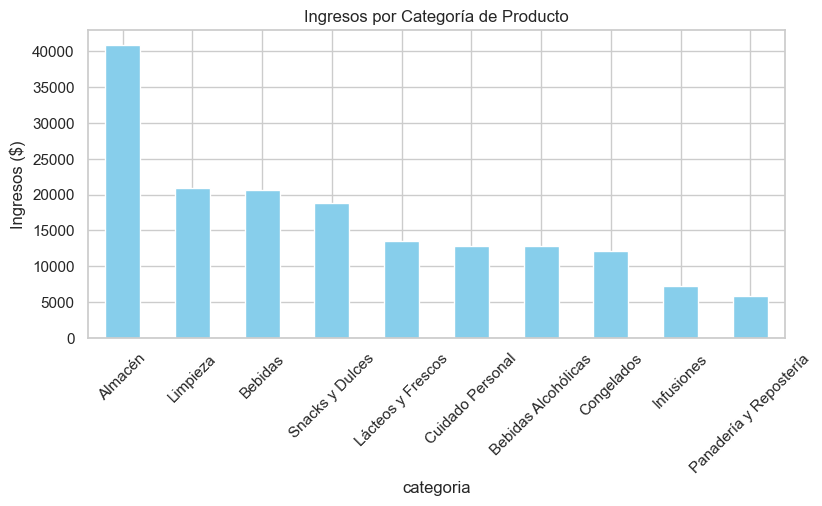

Ingresos por categoría:
Almacén - $40,878.35
Limpieza - $20,976.04
Bebidas - $20,594.92
Snacks y Dulces - $18,841.19
Lácteos y Frescos - $13,467.79
Cuidado Personal - $12,769.39
Bebidas Alcohólicas - $12,767.25
Congelados - $12,083.05
Infusiones - $7,260.74
Panadería y Repostería - $5,801.45


In [9]:
#Ingresos por categoría
ingresos_categoria = df_master.groupby("categoria")["monto_final"].sum().sort_values(ascending=False)
ingresos_categoria.plot(kind="bar", title="Ingresos por Categoría de Producto", figsize=(9,4), color='skyblue')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por categoría:")
for categoria, monto in ingresos_categoria.items():
    print(f"{categoria} - ${monto:,.2f}")

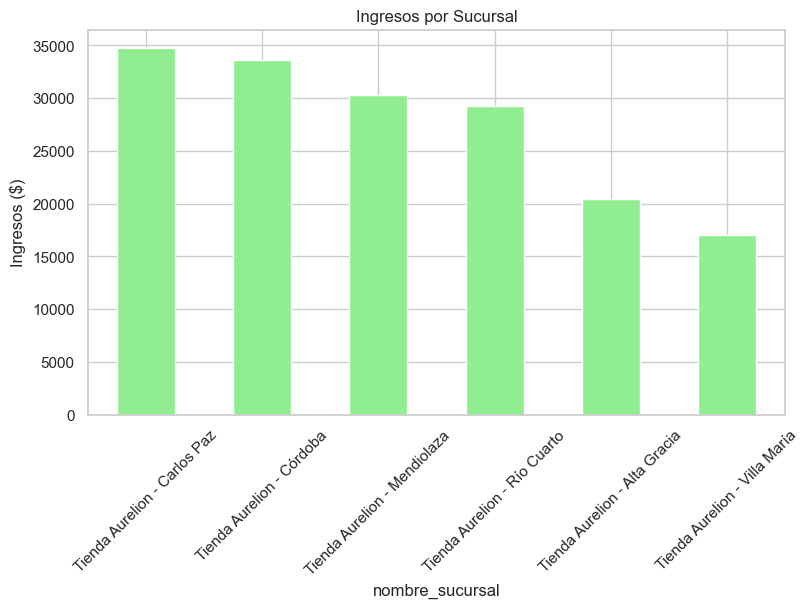

Ingresos por sucursal:
Tienda Aurelion - Carlos Paz - $34,760.12
Tienda Aurelion - Córdoba - $33,618.05
Tienda Aurelion - Mendiolaza - $30,282.02
Tienda Aurelion - Río Cuarto - $29,223.06
Tienda Aurelion - Alta Gracia - $20,491.82
Tienda Aurelion - Villa María - $17,065.11


In [10]:
#Ingresos por sucursal
ingresos_sucursal = df_master.groupby("nombre_sucursal")["monto_final"].sum().sort_values(ascending=False)
ingresos_sucursal.plot(kind="bar", title="Ingresos por Sucursal", figsize=(9,5), color='lightgreen')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por sucursal:")
for sucursal, monto in ingresos_sucursal.items():
    print(f"{sucursal} - ${monto:,.2f}")

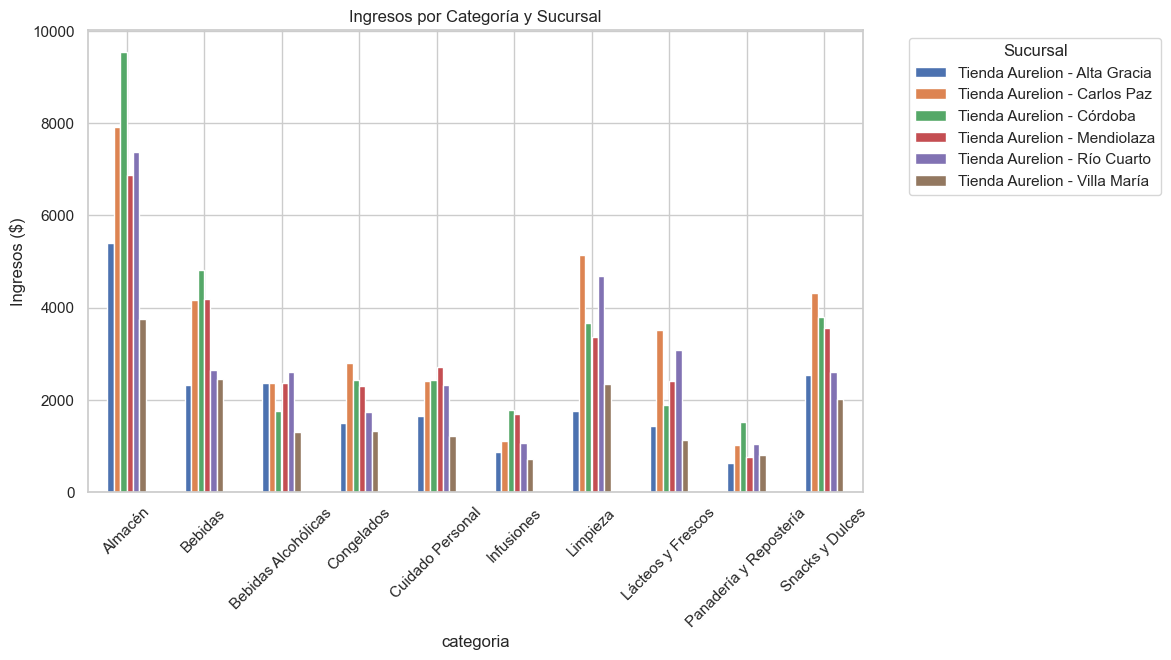

Ingresos por categoría y sucursal:
Almacén - Tienda Aurelion - Alta Gracia - $5,395.62
Almacén - Tienda Aurelion - Carlos Paz - $7,915.63
Almacén - Tienda Aurelion - Córdoba - $9,542.49
Almacén - Tienda Aurelion - Mendiolaza - $6,880.83
Almacén - Tienda Aurelion - Río Cuarto - $7,384.35
Almacén - Tienda Aurelion - Villa María - $3,759.42
Bebidas - Tienda Aurelion - Alta Gracia - $2,328.03
Bebidas - Tienda Aurelion - Carlos Paz - $4,166.65
Bebidas - Tienda Aurelion - Córdoba - $4,818.14
Bebidas - Tienda Aurelion - Mendiolaza - $4,182.36
Bebidas - Tienda Aurelion - Río Cuarto - $2,654.10
Bebidas - Tienda Aurelion - Villa María - $2,445.65
Bebidas Alcohólicas - Tienda Aurelion - Alta Gracia - $2,372.49
Bebidas Alcohólicas - Tienda Aurelion - Carlos Paz - $2,365.18
Bebidas Alcohólicas - Tienda Aurelion - Córdoba - $1,751.15
Bebidas Alcohólicas - Tienda Aurelion - Mendiolaza - $2,369.07
Bebidas Alcohólicas - Tienda Aurelion - Río Cuarto - $2,605.70
Bebidas Alcohólicas - Tienda Aurelion - Vi

In [11]:
#Ingresos por categoría y sucursal
ingresos_categoria_sucursal = df_master.groupby(["categoria", "nombre_sucursal"])["monto_final"].sum().unstack()
ingresos_categoria_sucursal.plot(kind="bar", title="Ingresos por Categoría y Sucursal", figsize=(10,6))
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.legend(title="Sucursal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Ingresos por categoría y sucursal:")
for categoria, sucursales in ingresos_categoria_sucursal.iterrows():
    for sucursal, monto in sucursales.items():
        print(f"{categoria} - {sucursal} - ${monto:,.2f}")

C:\Users\KEILY\AppData\Local\Temp\ipykernel_7868\3196318759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")


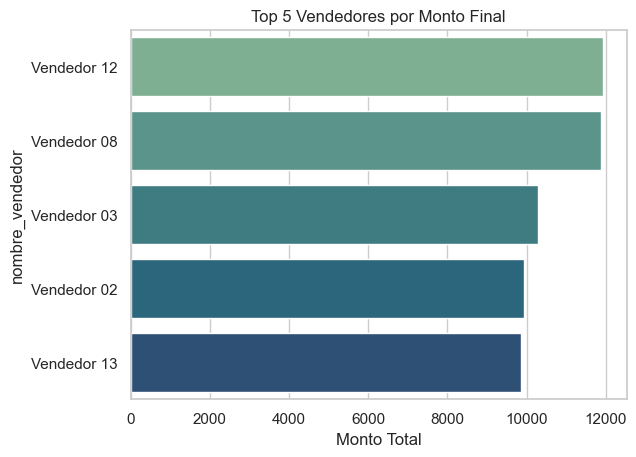

Top Vendedores:
Vendedor 12 - $11,929.14
Vendedor 08 - $11,891.23
Vendedor 03 - $10,281.52
Vendedor 02 - $9,942.16
Vendedor 13 - $9,859.00


In [12]:
#Top vendedores
top_vendedores = df_master.groupby("nombre_vendedor")["monto_final"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")
plt.title("Top 5 Vendedores por Monto Final")
plt.xlabel("Monto Total")
plt.show()

print("Top Vendedores:")
for vendedor, monto in top_vendedores.items():
    print(f"{vendedor} - ${monto:,.2f}")

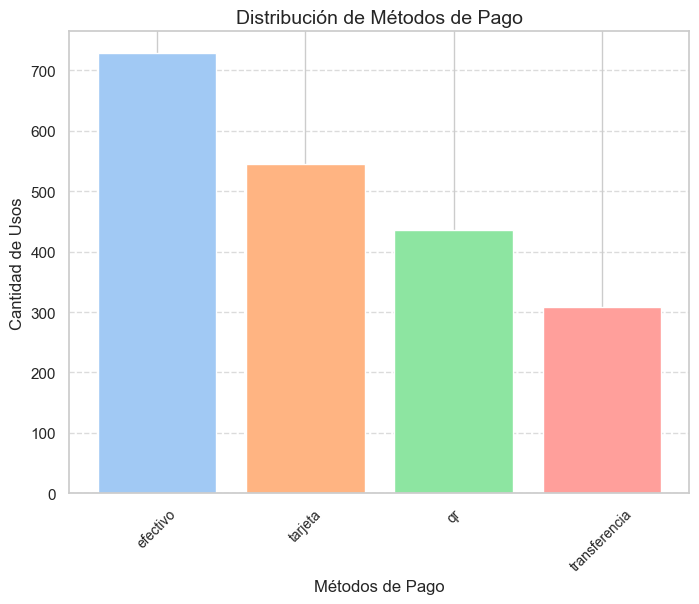

Distribución de métodos de pago:
efectivo - 728 usos
tarjeta - 545 usos
qr - 435 usos
transferencia - 308 usos


In [13]:
# Distribución de métodos de pago
metodos = df_master["nombre_medio_pago"].value_counts()
plt.figure(figsize=(8,6))
colors = sns.color_palette("pastel")
plt.bar(metodos.index, metodos.values, color=colors)
plt.title("Distribución de Métodos de Pago", fontsize=14)
plt.xlabel("Métodos de Pago", fontsize=12)
plt.ylabel("Cantidad de Usos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Distribución de métodos de pago:")
for metodo, cantidad in metodos.items():
    print(f"{metodo} - {cantidad} usos")

## Conclusión

Este análisis permitió consolidar múltiples fuentes de datos en un solo reporte integral. Se identificaron productos clave, vendedores destacados, diferencias entre sucursales y comportamiento de clientes frente a medios de pago.

Además, se logró:

- **Unificación de datos**: Integrar información de diversas tablas para obtener una vista completa del negocio.
- **Análisis detallado**: Identificar patrones de ventas, ingresos por categoría y sucursal, y métodos de pago preferidos.
- **Visualización efectiva**: Utilizar gráficos claros para comunicar hallazgos clave.

Estos resultados son fundamentales para tomar decisiones estratégicas basadas en datos y optimizar procesos internos. El siguiente paso será profundizar en el análisis predictivo y explorar nuevas oportunidades de crecimiento.

## Reflexiones y Próximos Pasos

El análisis realizado en este notebook nos brinda una perspectiva integral sobre las ventas y el comportamiento de los clientes. Sin embargo, siempre hay espacio para mejorar:

- **Profundizar en el análisis predictivo**: Utilizar modelos de machine learning para anticipar tendencias de ventas y comportamiento de clientes.
- **Segmentación avanzada**: Identificar grupos de clientes con características similares para personalizar estrategias de marketing.
- **Optimización de inventarios**: Analizar patrones de ventas para mejorar la gestión de stock y reducir costos.
- **Visualizaciones interactivas**: Implementar dashboards dinámicos que permitan explorar los datos de manera más intuitiva.

Estos pasos no solo fortalecerán la toma de decisiones, sino que también abrirán nuevas oportunidades para el crecimiento del negocio.

# SPRING 2
# Desarrollo de aplicación de técnicas estadisticas:
  1. Base de datos limpia y lista
  2. Calcular estadísticas básicas calculadas
  3. Identificar tipo de distribución de variables
  4. Análisis de correlaciones entre variables principales
  5. Detección deoutliers mediante curatiles y rangos
  6. Interpretar resultados para el problema de negocio
  7. Documentar


## 1: Caracterización inicial del DataFrame `df_master`

En esta fase, realizaremos una caracterización inicial del DataFrame `df_master` para comprender su estructura y contenido. Utilizaremos métodos de pandas para obtener estadísticas descriptivas y visualizaciones para entender la distribución de las variables numéricas.

## Información general del DataFrame


### Visualización de las primeras filas del DataFrame

In [14]:
# Mostrar las primeras filas del DataFrame df_master
print("Primeras 5 filas del DataFrame df_master:")
display(df_master.head())

Primeras 5 filas del DataFrame df_master:


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo,2023,1,Monday,0.0,29.02
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,119.70
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,23.45
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,81.22
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,20.69


## Verificación de tipos de datos

Utilizaremos el método `.info()` para obtener un resumen de los tipos de datos de cada columna en el DataFrame `df_master`.

In [15]:
# Proporcionar una vista compacta de la estructura interna del DataFrame
print("\nInformación general sobre los tipos de datos del DataFrame df_master:")
df_master.info()


Información general sobre los tipos de datos del DataFrame df_master:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_venta                2016 non-null   int64         
 1   id_producto             2016 non-null   int64         
 2   nombre_producto_x       2016 non-null   object        
 3   cantidad                2016 non-null   int64         
 4   precio_unitario_x       2016 non-null   float64       
 5   importe                 2016 non-null   float64       
 6   descuento_aplicado_pct  2016 non-null   int64         
 7   subtotal                2016 non-null   float64       
 8   nombre_producto_y       2016 non-null   object        
 9   categoria               2016 non-null   object        
 10  precio_unitario_y       2016 non-null   float64       
 11  subcategoria            2016 non-null

### Verificación de la conversión de fechas en `df_master`

Confirmaremos que las columnas de fecha (`fecha_alta`, `fecha`, `fecha_ingreso`) tienen el tipo de dato `datetime64[ns]`.

In [27]:
# Mostrar los tipos de datos específicos de las columnas de fecha
print("\nTipos de datos de las columnas de fecha:")
print(df_master[['fecha_alta', 'fecha', 'fecha_ingreso']].dtypes)


Tipos de datos de las columnas de fecha:
fecha_alta       datetime64[ns]
fecha            datetime64[ns]
fecha_ingreso    datetime64[ns]
dtype: object


## Verificación de datos Completos

Según los criterios del Anexo, los datos esenciales no deben estar nulos o incompletos. En esta sección, verificaremos la presencia de valores nulos en el DataFrame `df_master` para asegurar que no faltan datos esenciales para el análisis.



### Verificación de valores nulos

Utilizaremos el método `.isnull().sum()` para contar el número de valores nulos por columna en el DataFrame `df_master`.

In [28]:
# Verificar valores nulos en cada columna de df_master
print("Número de valores nulos por columna en df_master:")
display(df_master.isnull().sum())

Número de valores nulos por columna en df_master:


id_venta                  0
id_producto               0
nombre_producto_x         0
cantidad                  0
precio_unitario_x         0
importe                   0
descuento_aplicado_pct    0
subtotal                  0
nombre_producto_y         0
categoria                 0
precio_unitario_y         0
subcategoria              0
fecha                     0
id_cliente                0
id_sucursal_x             0
id_vendedor               0
id_medio_pago             0
nombre_cliente_x          0
email_x                   0
medio_pago_original       0
estado_venta              0
monto_bruto               0
monto_neto                0
nombre_cliente_y          0
email_y                   0
ciudad_x                  0
fecha_alta                0
genero                    0
edad_rango                0
activo_como_cliente       0
nombre_sucursal           0
ciudad_y                  0
provincia                 0
nombre_vendedor           0
id_sucursal_y             0
fecha_ingreso       

### 2: Calcular estadísticas básicas calculadas

En esta fase, realizaremos cálculos de estadísticas descriptivas para las variables numéricas clave en `df_master` para comprender su distribución y características centrales.

In [16]:
# Mostrar un resumen estadístico de las variables numéricas del DataFrame
print("\nResumen estadístico de las variables numéricas de df_master:")
display(df_master.describe())


Resumen estadístico de las variables numéricas de df_master:


,id_venta,id_producto,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,precio_unitario_y,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,monto_bruto,monto_neto,fecha_alta,id_sucursal_y,fecha_ingreso,año,mes,descuento_pct,monto_final
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016,2016.000000,2016,2016.000000,2016.000000,2016.000000,2016.000000
mean,346.531250,50.322421,2.675595,31.447951,83.859435,1.173115,82.917202,31.447951,2023-10-21 22:18:34.285714432,49.303075,3.310020,10.443452,2.160218,279.660109,279.660109,2023-02-18 07:16:25.714285824,3.310020,2022-12-21 23:32:08.571428352,2023.407242,5.295139,0.011731,82.063579
min,1.000000,1.000000,1.000000,2.720000,2.720000,0.000000,2.720000,2.720000,2023-01-02 00:00:00,1.000000,1.000000,1.000000,1.000000,2.720000,2.720000,2023-01-01 00:00:00,1.000000,2022-04-06 00:00:00,2023.000000,1.000000,0.000000,2.720000
25%,153.000000,25.000000,2.000000,20.690000,40.397500,0.000000,39.620000,20.690000,2023-06-03 00:00:00,25.000000,2.000000,6.000000,1.000000,170.800000,170.800000,2023-01-25 00:00:00,2.000000,2022-06-09 00:00:00,2023.000000,3.000000,0.000000,39.060000
50%,344.500000,49.500000,3.000000,32.040000,76.395000,0.000000,74.310000,32.040000,2023-11-09 00:00:00,46.000000,3.000000,10.000000,2.000000,261.700000,261.700000,2023-02-15 00:00:00,3.000000,2023-01-23 00:00:00,2023.000000,5.000000,0.000000,73.080000
75%,534.000000,76.000000,4.000000,42.860000,121.440000,0.000000,120.560000,42.860000,2024-03-14 00:00:00,75.000000,5.000000,15.000000,3.000000,375.720000,375.720000,2023-03-16 00:00:00,5.000000,2023-07-13 00:00:00,2024.000000,7.000000,0.000000,119.037500
max,720.000000,100.000000,5.000000,49.820000,249.100000,15.000000,248.650000,49.820000,2024-06-28 00:00:00,100.000000,6.000000,20.000000,4.000000,786.510000,786.510000,2023-04-10 00:00:00,6.000000,2023-10-28 00:00:00,2024.000000,12.000000,0.150000,248.650000
std,212.057682,29.104692,1.256218,12.825875,54.423370,3.098914,54.022666,12.825875,NaN,29.916773,1.808614,5.583721,1.078380,146.116374,146.116374,NaN,1.808614,NaN,0.491443,3.270546,0.030989,53.797310


### Visualización de la distribución de variables numéricas

A continuación, generaremos histogramas para visualizar la distribución de algunas variables numéricas clave en `df_master`.

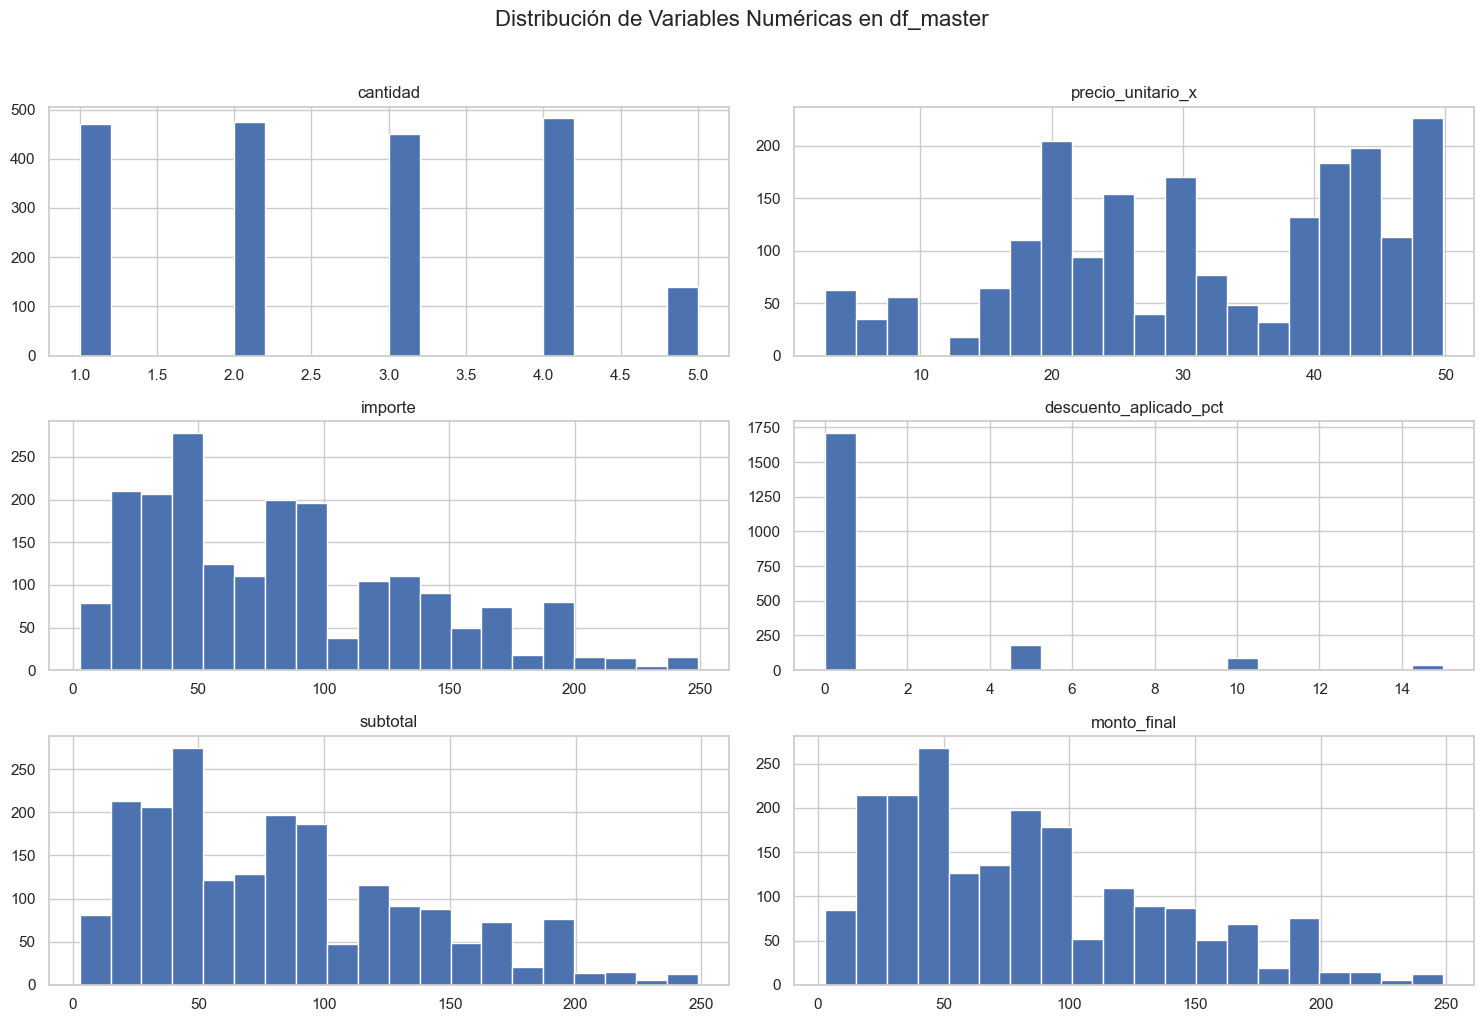

In [17]:
# Seleccionar columnas numéricas para visualización de distribución
numerical_cols_viz = ['cantidad', 'precio_unitario_x', 'importe', 'descuento_aplicado_pct', 'subtotal', 'monto_final']

# Crear histogramas para cada columna numérica seleccionada
df_master[numerical_cols_viz].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas en df_master", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Los histogramas generados nos proporcionan una visión gráfica de cómo se distribuyen los valores en las variables numéricas clave de nuestro DataFrame `df_master`, lo que nos ayuda comprender su distribución y características centrales:



### Resumen estadístico de las variables numéricas

Calcularemos y mostraremos un resumen estadístico de las variables numéricas relevantes en el DataFrame.

| Estadístico | cantidad | precio_unitario_x | importe | descuento_aplicado_pct | subtotal | monto_bruto | monto_neto | monto_final |
|---|---|---|---|---|---|---|---|---|
| count | 2016 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 |
| mean | 2.68 | 31.45 | 83.86 | 1.17 | 82.92 | 279.66 | 279.66 | 82.06 |
| std | 1.26 | 12.83 | 54.42 | 3.10 | 54.02 | 146.12 | 146.12 | 53.80 |
| min | 1.00 | 2.72 | 2.72 | 0.00 | 2.72 | 2.72 | 2.72 | 2.72 |
| 25% | 2.00 | 20.69 | 40.40 | 0.00 | 39.62 | 170.80 | 170.80 | 39.06 |
| 50% | 3.00 | 32.04 | 76.40 | 0.00 | 74.31 | 261.70 | 261.70 | 73.08 |
| 75% | 4.00 | 42.86 | 121.44 | 0.00 | 120.56 | 375.72 | 375.72 | 119.04 |
| max | 5.00 | 49.82 | 249.10 | 15.00 | 248.65 | 786.51 | 786.51 | 248.65 |

### Interpretación de las Estadísticas Descriptivas de Variables Numéricas

Las estadísticas descriptivas para las variables numéricas clave en `df_master` nos proporcionan un resumen cuantitativo de su distribución y características centrales:

*   **`cantidad`**:
    *   **count (2016)**: Hay 2016 registros de cantidad de productos por detalle de venta.
    *   **mean (2.68)**: En promedio, se venden aproximadamente 2.68 unidades por detalle de venta.
    *   **std (1.26)**: La desviación estándar es de 1.26, lo que indica una dispersión moderada alrededor de la media.
    *   **min (1.00)**: La cantidad mínima vendida en un detalle de venta es 1 unidad.
    *   **25% (2.00)**: El 25% de los detalles de venta tienen 2 unidades o menos.
    *   **50% (3.00)**: La mediana es 3 unidades, lo que significa que la mitad de los detalles de venta tienen 3 unidades o menos.
    *   **75% (4.00)**: El 75% de los detalles de venta tienen 4 unidades o menos.
    *   **max (5.00)**: La cantidad máxima vendida en un detalle de venta es 5 unidades.
    *   **Hallazgo**: La mayoría de las transacciones involucran una cantidad pequeña de productos (entre 1 y 4), lo que se alinea con la observación de los histogramas.

*   **`precio_unitario_x`**:
    *   **count (2016)**: Hay 2016 registros de precio unitario por detalle de venta.
    *   **mean (31.45)**: El precio unitario promedio de los productos es de aproximadamente $31.45.
    *   **std (12.83)**: La desviación estándar de 12.83 sugiere una variabilidad considerable en los precios unitarios.
    *   **min (2.72)**: El precio unitario mínimo es de $2.72.
    *   **max (49.82)**: El precio unitario máximo es de $49.82.
    *   **Hallazgo**: Existe una amplia gama de precios unitarios en los productos, como se observó en el histograma.

*   **`importe`**:
    *   **count (2016)**: Hay 2016 registros de importe por detalle de venta.
    *   **mean (83.86)**: El importe promedio por detalle de venta es de aproximadamente $83.86.
    *   **std (54.42)**: La desviación estándar de 54.42 es relativamente alta en comparación con la media, lo que indica una dispersión significativa de los importes.
    *   **min (2.72)**: El importe mínimo es de $2.72.
    *   **max (249.10)**: El importe máximo es de $249.10.
    *   **Hallazgo**: La media es notablemente mayor que la mediana (76.40), lo que confirma la asimetría positiva observada en el histograma, con algunos detalles de venta de alto importe.

*   **`descuento_aplicado_pct`**:
    *   **count (2016)**: Hay 2016 registros de porcentaje de descuento aplicado.
    *   **mean (1.17)**: El porcentaje de descuento promedio aplicado es muy bajo, alrededor del 1.17%.
    *   **std (3.10)**: La desviación estándar es de 3.10, lo que indica que la mayoría de los descuentos son 0, pero existen algunos valores más altos que generan dispersión.
    *   **min (0.00)**: El descuento mínimo aplicado es 0%.
    *   **25% (0.00)**, **50% (0.00)**, **75% (0.00)**: Los cuartiles indican que el 75% de los detalles de venta no tienen descuento.
    *   **max (15.00)**: El descuento máximo aplicado es del 15%.
    *   **Hallazgo**: Los descuentos no son una práctica común en la mayoría de las transacciones.

*   **`subtotal`**:
    *   **count (2016)**: Hay 2016 registros de subtotal por detalle de venta.
    *   **mean (82.92)**: El subtotal promedio por detalle de venta es de aproximadamente $82.92.
    *   **std (54.02)**: La desviación estándar es de 54.02, similar a la del `importe`, lo que indica una dispersión comparable.
    *   **min (2.72)**: El subtotal mínimo es de $2.72.
    *   **max (248.65)**: El subtotal máximo es de $248.65.
    *   **Hallazgo**: Al igual que el `importe`, la media (82.92) es mayor que la mediana (74.31), confirmando la asimetría positiva.

*   **`monto_bruto`**:
    *   **count (2016)**: Hay 2016 registros de monto bruto por venta.
    *   **mean (279.66)**: El monto bruto promedio por venta es de aproximadamente $279.66.
    *   **std (146.12)**: La desviación estándar de 146.12 es alta, lo que indica una gran variabilidad en el monto total de las ventas.
    *   **min (2.72)**: El monto bruto mínimo es de $2.72.
    *   **max (786.51)**: El monto bruto máximo es de $786.51.
    *   **Hallazgo**: Existe una amplia dispersión en el valor total de las ventas.

*   **`monto_neto`**:
    *   **count (2016)**: Hay 2016 registros de monto neto por venta.
    *   **mean (279.66)**: El monto neto promedio por venta es de aproximadamente $279.66.
    *   **std (146.12)**: La desviación estándar es de 146.12, idéntica a la del monto bruto, lo que sugiere que los descuentos aplicados a nivel de detalle de venta no impactan significativamente el monto total a nivel de venta en promedio.
    *   **min (2.72)**: El monto neto mínimo es de $2.72.
    *   **max (786.51)**: El monto neto máximo es de $786.51.
    *   **Hallazgo**: El monto neto es igual al monto bruto en este dataset, lo que indica que los descuentos aplicados a nivel de detalle de venta no se reflejan en las columnas `monto_bruto` y `monto_neto` de la tabla de ventas principal. Esto podría ser un punto a investigar o tener en cuenta para futuros análisis si se espera que los descuentos afecten el monto total de la venta.

*   **`monto_final`**:
    *   **count (2016)**: Hay 2016 registros de monto final por detalle de venta.
    *   **mean (82.06)**: El monto final promedio por detalle de venta es de aproximadamente $82.06.
    *   **std (53.80)**: La desviación estándar es de 53.80, similar a la del `importe` y `subtotal`.
    *   **min (2.72)**: El monto final mínimo es de $2.72.
    *   **max (248.65)**: El monto final máximo es de $248.65.
    *   **Hallazgo**: El monto final, que considera el descuento a nivel de detalle, es ligeramente menor que el `importe` y `subtotal` promedio, lo cual es lógico, aunque la diferencia es pequeña debido al bajo porcentaje promedio de descuento aplicado.

   En general, las variables relacionadas con el valor monetario de las transacciones (`importe`, `subtotal`, `monto_final`) muestran distribuciones sesgadas hacia la derecha, lo que es común en datos de ventas donde la mayoría de las transacciones son de bajo valor, pero existen algunas transacciones de alto valor que tiran la media hacia arriba. La variable `cantidad` indica que las compras suelen ser de pocos artículos, y `descuento_aplicado_pct` confirma que los descuentos no son una práctica generalizada.

## 3: Identificación del tipo de distribución de variables numéricas

En esta fase, calcularemos el tipo de distribución de las variables numéricas clave en `df_master` para identificar y comprender la forma de sus distribuciones.

## Visualización de las Distribuciones

Utilizaremos box plots y violin plots. Estas visualizaciones nos ayudarán a entender mejor la dispersión, la presencia de outliers y la forma general de las distribuciones.

### Box plots (Diagramas de Caja)

Los box plots son útiles para visualizar la mediana, los cuartiles y la presencia de valores atípicos.

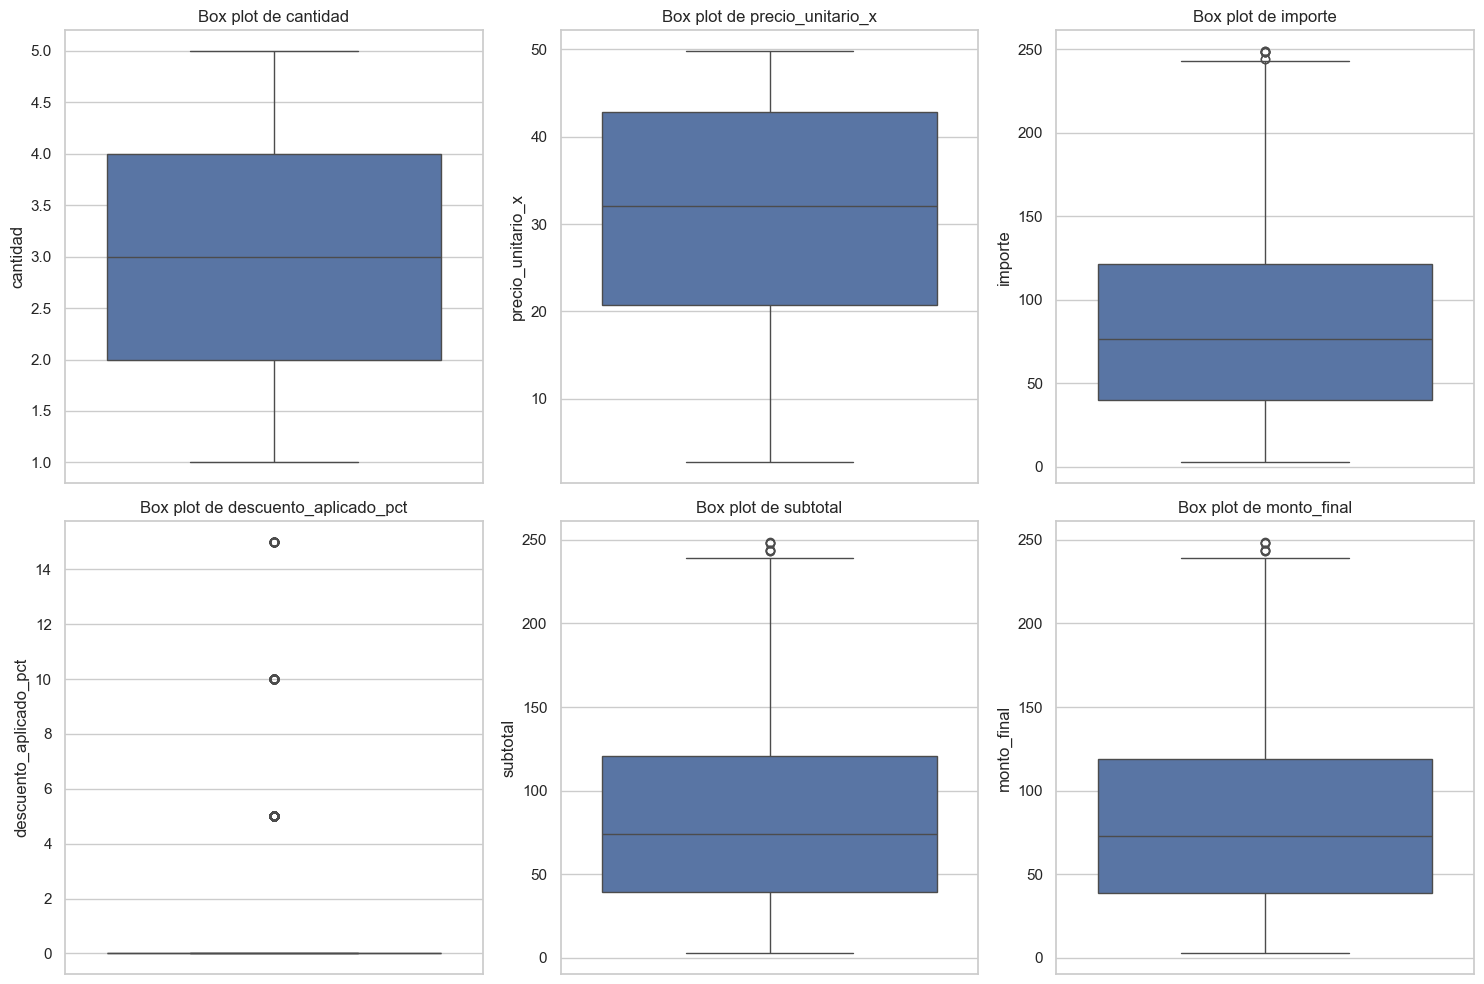

In [19]:
# Seleccionar columnas numéricas para visualización adicional
numerical_cols_viz = ['cantidad', 'precio_unitario_x', 'importe', 'descuento_aplicado_pct', 'subtotal', 'monto_final']

# Crear box plots para cada columna numérica seleccionada
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_master[col])
    plt.title(f'Box plot de {col}')
plt.tight_layout()
plt.show()

### Interpretación de los Box plots

* **`cantidad`**: El box plot muestra que la mayoría de los valores están entre 2 y 4, con la mediana en 3. No parece haber outliers evidentes en esta variable.
* **`precio_unitario_x`**: La caja central abarca un rango amplio de precios, lo que concuerda con la desviación estándar observada. No se aprecian outliers significativos.
* **`importe`**, **`subtotal`**, **`monto_final`**: Estos box plots son similares y muestran una concentración de datos en la parte baja de la distribución, con una cola superior más larga y la presencia de algunos puntos que podrían ser considerados outliers (los puntos individuales por encima del bigote superior). Esto confirma el sesgo positivo identificado con la asimetría.
* **`descuento_aplicado_pct`**: Este box plot muestra claramente que la gran mayoría de los valores son 0. Los puntos individuales por encima de 0 representan los descuentos aplicados y son identificados como outliers por el método del box plot.

### Violin plots (Diagramas de Violín)

Los violin plots combinan un box plot con una estimación de la densidad de probabilidad, mostrando la forma de la distribución de manera más detallada.

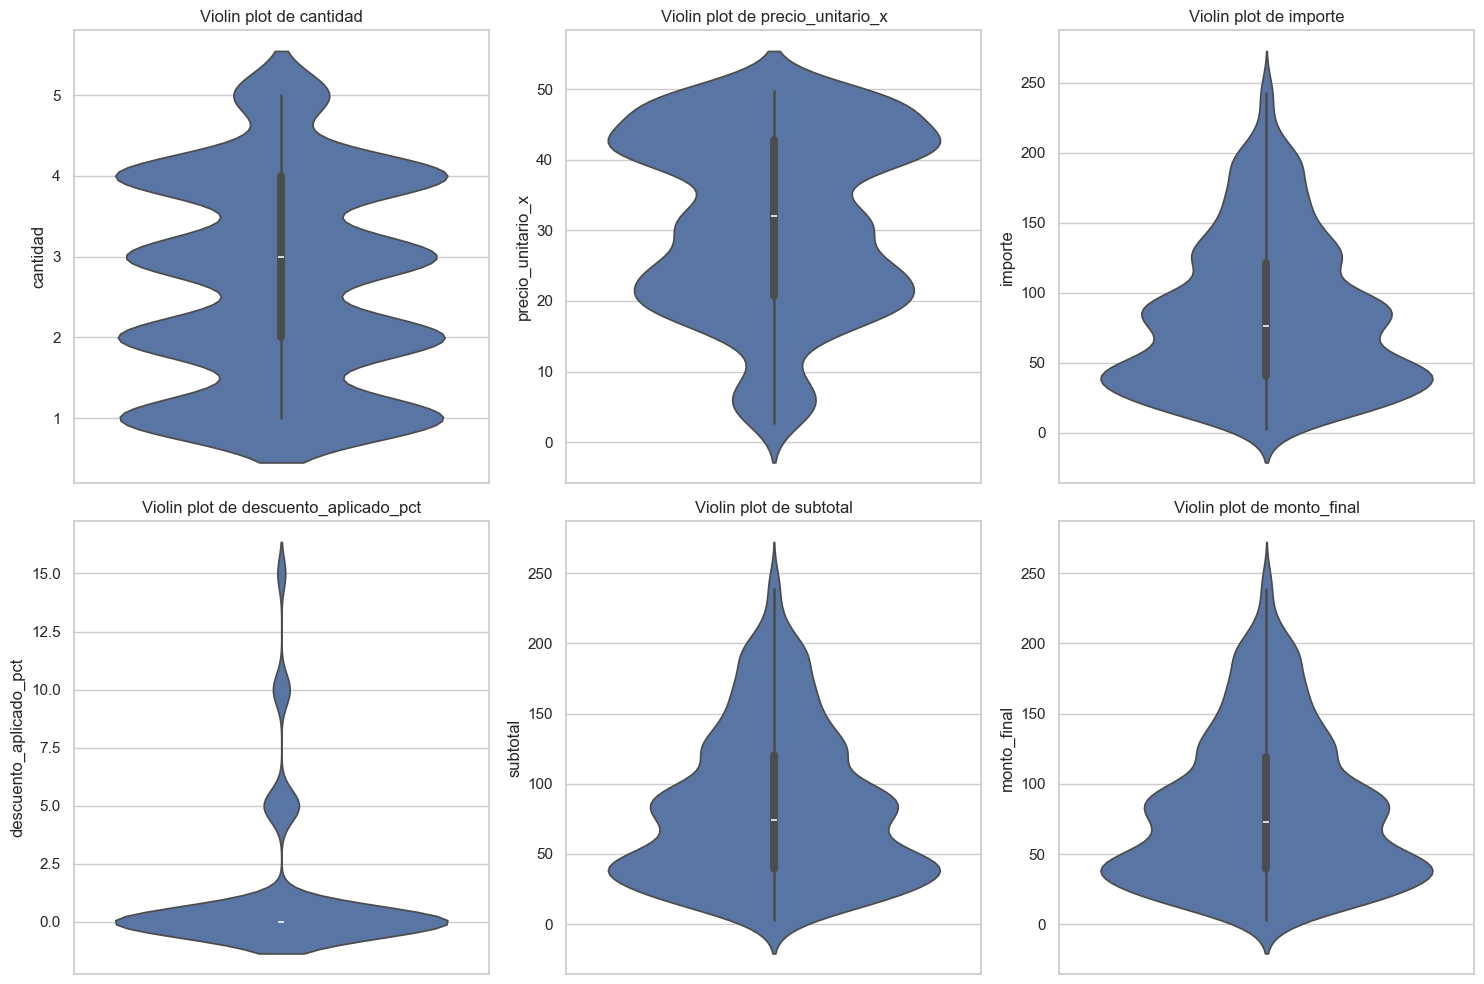

In [20]:
# Crear violin plots para cada columna numérica seleccionada
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df_master[col])
    plt.title(f'Violin plot de {col}')
plt.tight_layout()
plt.show()

### Interpretación de los Violin plots

Los violin plots confirman las observaciones de los histogramas y box plots:

* **`cantidad`**: La forma del violín es relativamente simétrica alrededor de la mediana, aunque con mayor densidad en los valores enteros (1, 2, 3, 4, 5).
* **`precio_unitario_x`**: El violín muestra una distribución más extendida, sin picos pronunciados, lo que sugiere una distribución más uniforme de los precios unitarios.
* **`importe`**, **`subtotal`**, **`monto_final`**: La forma de estos violines es más ancha en la parte inferior y se estrecha hacia arriba, lo que ilustra claramente el sesgo positivo y la concentración de datos en valores más bajos.
* **`descuento_aplicado_pct`**: El violin plot para el descuento es muy estrecho en la parte inferior (en 0) y se ensancha ligeramente en los valores de descuento, mostrando visualmente la baja frecuencia de descuentos aplicados.



### Interpretación General del Tipo de Distribución de Variables Numéricas (Basado en Box Plots y Violin Plots)

En conjunto, estas visualizaciones nos brindan una comprensión más completa de la forma, dispersión y presencia de posibles outliers en las distribuciones de las variables numéricas. La combinación de Box plots y Violin plots nos ha proporcionado una confirmación visual robusta de las características de las distribuciones de las variables numéricas:

* Las variables monetarias a nivel de detalle de venta (`importe`, `subtotal`, `monto_final`) y a nivel de venta (`monto_bruto`, `monto_neto`) presentan un **fuerte sesgo positivo**, lo que es una característica típica de los datos de ventas donde hay muchas transacciones pequeñas y algunas pocas grandes.
* El `descuento_aplicado_pct` es una variable con una distribución extremadamente **no normal y altamente sesgada**, donde el valor 0 domina por completo.
* `cantidad` y `precio_unitario_x` tienen distribuciones más **equilibradas**, aunque no necesariamente normales, sin la presencia de outliers significativos según el método IQR en `cantidad`.

Estas visualizaciones son fundamentales para complementar las estadísticas descriptivas numéricas, ya que nos dan una intuición directa sobre la forma de los datos, la concentración de valores y la ubicación de posibles outliers, lo cual es vital para la fase de preparación de datos y la selección de técnicas de análisis posteriores.

## 4: Análisis de correlaciones entre variables principales

En esta fase, exploraremos las relaciones lineales entre las variables numéricas clave calculando la matriz de correlación y visualizándola mediante un mapa de calor.

### Cálculo de la Matriz de Correlación de Pearson

In [38]:
# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numerical_cols_corr = ['cantidad', 'precio_unitario_x', 'importe', 'subtotal', 'monto_bruto', 'monto_neto', 'monto_final']

# Calcular la matriz de correlación de Pearson
correlation_matrix_pearson = df_master[numerical_cols_corr].corr(method='pearson')

# Mostrar la matriz de correlación
print("\nMatriz de Correlación de Pearson de las variables numéricas clave en df_master:")
display(correlation_matrix_pearson)


Matriz de Correlación de Pearson de las variables numéricas clave en df_master:


,cantidad,precio_unitario_x,importe,subtotal,monto_bruto,monto_neto,monto_final
cantidad,1.000000,-0.017545,0.710145,0.709434,0.322723,0.322723,0.706964
precio_unitario_x,-0.017545,1.000000,0.626809,0.624753,0.219453,0.219453,0.621281
importe,0.710145,0.626809,1.000000,0.998489,0.406179,0.406179,0.994560
subtotal,0.709434,0.624753,0.998489,1.000000,0.404848,0.404848,0.998780
monto_bruto,0.322723,0.219453,0.406179,0.404848,1.000000,1.000000,0.402536
monto_neto,0.322723,0.219453,0.406179,0.404848,1.000000,1.000000,0.402536
monto_final,0.706964,0.621281,0.994560,0.998780,0.402536,0.402536,1.000000


### Visualización de la Matriz de Correlación de Pearson (Mapa de Calor)

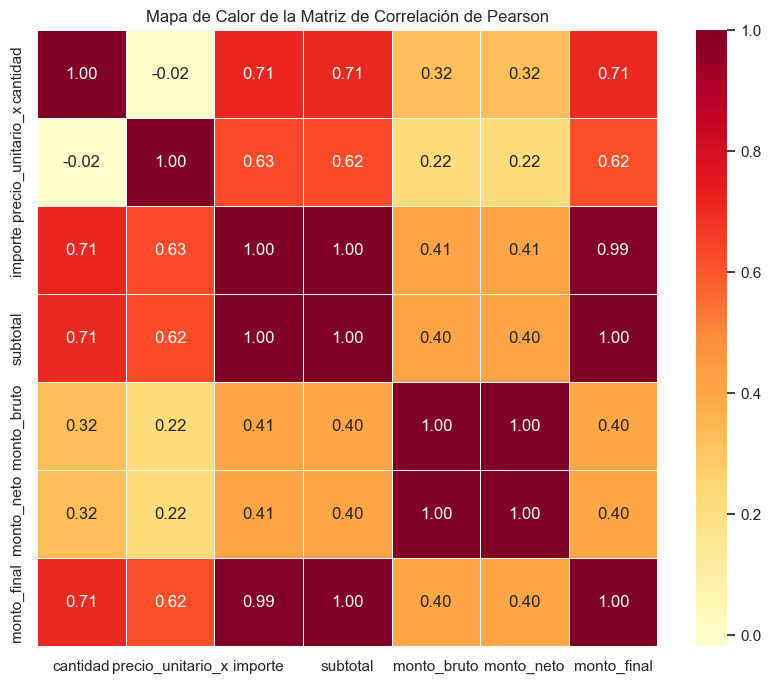

In [32]:
# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de la Matriz de Correlación de Pearson") # Added label
plt.show()

### Interpretación de la Matriz de Correlación y el Mapa de Calor

La matriz de correlación y el mapa de calor nos muestran la fuerza y dirección de la relación lineal entre pares de variables numéricas:

* **Valores cercanos a 1**: Indican una fuerte correlación positiva (cuando una variable aumenta, la otra también tiende a aumentar).
* **Valores cercanos a -1**: Indican una fuerte correlación negativa (cuando una variable aumenta, la otra tiende a disminuir).
* **Valores cercanos a 0**: Indican una correlación lineal débil o nula.

Observaciones clave de la matriz y el mapa de calor:

* **`importe`, `subtotal`, `monto_final`**: Como era de esperar, estas variables están muy fuertemente correlacionadas positivamente entre sí (valores cercanos a 1). Esto tiene sentido ya que representan valores monetarios muy relacionados dentro de un mismo detalle de venta. La ligera diferencia en la correlación entre `importe`/`subtotal` y `monto_final` se debe a la aplicación del descuento.
* **`cantidad` e `importe`/`subtotal`/`monto_final`**: Existe una correlación positiva moderada a fuerte entre la `cantidad` de productos en un detalle de venta y el `importe`, `subtotal` y `monto_final`. Esto es lógico, ya que a mayor cantidad de productos, mayor tiende a ser el importe total del detalle.
* **`precio_unitario_x` e `importe`/`subtotal`/`monto_final`**: También hay una correlación positiva moderada entre el `precio_unitario_x` y el `importe`, `subtotal` y `monto_final`. Esto indica que productos con mayor precio unitario tienden a contribuir a mayores importes en los detalles de venta donde se incluyen.
* **`cantidad` y `precio_unitario_x`**: La correlación entre `cantidad` y `precio_unitario_x` es cercana a 0 (-0.0175). Esto sugiere que no hay una relación lineal fuerte entre la cantidad de productos comprados en un detalle de venta y el precio unitario de esos productos.
* **`monto_bruto` y `monto_neto`**: Estas variables están perfectamente correlacionadas positivamente (valor de 1.00). Esto confirma que en este dataset, el monto bruto y el monto neto a nivel de venta son idénticos, lo cual ya habíamos notado y sugiere que los descuentos a nivel de detalle no se restan en estas columnas.
* **Correlaciones entre variables de detalle (`cantidad`, `precio_unitario_x`, `importe`, `subtotal`, `monto_final`) y variables de venta (`monto_bruto`, `monto_neto`)**: Las correlaciones entre estas dos series de variables son positivas pero más débiles en comparación con las correlaciones dentro de cada grupo. Esto es esperable, ya que `monto_bruto` y `monto_neto` representan el total de una venta (que puede incluir múltiples detalles de venta), mientras que las otras variables son a nivel de detalle.

Este análisis de correlación nos ayuda a entender las interdependencias entre las variables numéricas, lo cual es útil para modelado predictivo o para identificar relaciones importantes en los datos.

## Análisis de Correlación de Spearman

Calcularemos la matriz de correlación de Spearman, que es menos sensible a outliers y relaciones no lineales, para complementar el análisis de Pearson.

### Cálculo de la Matriz de Correlación de Spearman

In [33]:
# Calcular la matriz de correlación de Spearman
correlation_matrix_spearman = df_master[numerical_cols_corr].corr(method='spearman')

# Mostrar la matriz de correlación de Spearman
print("\nMatriz de Correlación de Spearman de las variables numéricas clave en df_master:")
display(correlation_matrix_spearman)


Matriz de Correlación de Spearman de las variables numéricas clave en df_master:


,cantidad,precio_unitario_x,importe,subtotal,monto_bruto,monto_neto,monto_final
cantidad,1.000000,-0.008519,0.707304,0.708020,0.316858,0.316858,0.707184
precio_unitario_x,-0.008519,1.000000,0.639083,0.635685,0.221618,0.221618,0.630834
importe,0.707304,0.639083,1.000000,0.998586,0.393725,0.393725,0.995284
subtotal,0.708020,0.635685,0.998586,1.000000,0.391361,0.391361,0.998901
monto_bruto,0.316858,0.221618,0.393725,0.391361,1.000000,1.000000,0.389452
monto_neto,0.316858,0.221618,0.393725,0.391361,1.000000,1.000000,0.389452
monto_final,0.707184,0.630834,0.995284,0.998901,0.389452,0.389452,1.000000


### Visualización de la Matriz de Correlación de Spearman (Mapa de Calor)

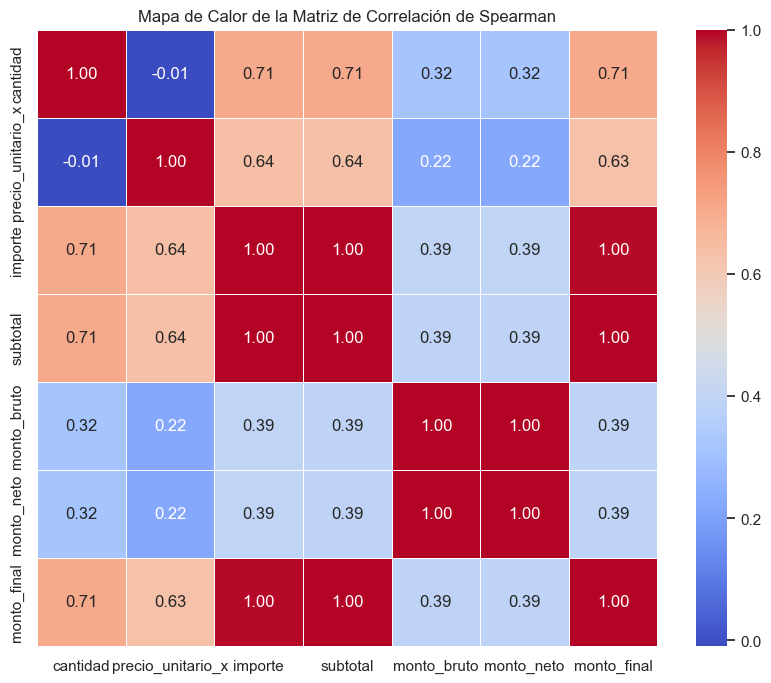

In [34]:
# Crear un mapa de calor (heatmap) de la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de la Matriz de Correlación de Spearman")
plt.show()

### Interpretación de la Matriz de Correlación de Spearman

En general, los coeficientes de Spearman tenderán a ser similares a los de Pearson si las relaciones son predominantemente lineales y no hay outliers extremos. Sin embargo, pueden diferir notablemente si hay fuertes relaciones monótonas que no son lineales, o si los outliers influyen en la correlación de Pearson.
Este análisis complementario con Spearman nos da una visión más completa y robusta de las asociaciones entre las variables numéricas, especialmente útil dado el sesgo y los posibles outliers que hemos identificado en pasos anteriores.

### **Comparación de los mapas de calor de Pearson y Spearman** ###

Al comparar la matriz de correlación de Spearman con la de Pearson, podemos observar si la presencia de outliers o la naturaleza no lineal de algunas relaciones afectó significativamente los coeficientes de correlación. En general, los coeficientes de Spearman tenderán a ser similares a los de Pearson si las relaciones son predominantemente lineales y no hay outliers extremos. Sin embargo, pueden diferir notablemente si hay fuertes relaciones monótonas que no son lineales, o si los outliers influyen en la correlación de Pearson.
Este análisis complementario nos da una visión más completa y robusta de las asociaciones entre las variables numéricas, especialmente útil dado el sesgo y los posibles outliers que hemos identificado en pasos anteriores.


***Consideraciones sobre outliers y sesgo en las correlaciones***

Al comparar los mapas de calor de Pearson y Spearman, podemos notar lo siguiente:

*   **Correlaciones fuertes (cercanas a 1 o -1):** Para las variables que ya mostraron una correlación de Pearson muy fuerte (por ejemplo, entre `importe`, `subtotal` y `monto_final`), los valores de Spearman son muy similares. Esto sugiere que estas relaciones son consistentemente fuertes y monótonas, y los outliers no afectan drásticamente su ordenamiento.
*   **Correlaciones moderadas:** Para correlaciones moderadas (como entre `cantidad` y las variables de monto, o entre `precio_unitario_x` y las variables de monto), los valores de Spearman también son bastante parecidos a los de Pearson, aunque puede haber ligeras variaciones. Esto indica que la relación monótona es similar a la relación lineal para la mayoría de los datos.
*   **Correlaciones débiles (cercanas a 0):** La correlación entre `cantidad` y `precio_unitario_x` sigue siendo muy cercana a 0 en Spearman (-0.0085), al igual que en Pearson (-0.0175). Esto refuerza la idea de que no hay una relación lineal o monótona significativa entre la cantidad de artículos comprados y su precio unitario en un detalle de venta.
*   **Impacto de Outliers/Sesgo:** Aunque las diferencias no son drásticas en este dataset particular para la mayoría de las variables (lo que podría sugerir que los outliers no son extremadamente influyentes en el ordenamiento de los rangos, o que las relaciones monótonas son bastante lineales), la correlación de Spearman es inherentemente más robusta ante la presencia de esos outliers y el sesgo que observamos en las distribuciones. Por lo tanto, los valores de Spearman pueden considerarse una representación más fiable de la asociación general entre las variables en presencia de datos no normales o con outliers.

En resumen, en este caso, los resultados de Pearson y Spearman son bastante consistentes, lo que es positivo. Sin embargo, si tuviéramos outliers más extremos o relaciones claramente no lineales, las diferencias serían más pronunciadas. La correlación de Spearman nos da confianza en que las asociaciones que observamos no están siendo indebidamente influenciadas por los valores extremos.

### 5: Detección de Outliers mediante Cuartiles y Rangos (Método IQR)

En esta fase, aplicaremos el método del rango intercuartílico (IQR) para identificar posibles outliers en algunas de las variables numéricas clave de `df_master`. Este método es menos sensible a los extremos que, por ejemplo, la detección basada en la desviación estándar.

### Cálculo de Cuartiles, IQR y Límites para Detección de Outliers

Calcularemos el primer cuartil (Q1), el tercer cuartil (Q3) y el rango intercuartílico (IQR) para la variable `monto_final`. Luego, definiremos los límites inferior y superior para identificar outliers.

In [36]:
# Seleccionar la variable para la detección de outliers (por ejemplo, 'monto_final')
variable_outliers = 'monto_final'

# Calcular el primer cuartil (Q1)
Q1 = df_master[variable_outliers].quantile(0.25)

# Calcular el tercer cuartil (Q3)
Q3 = df_master[variable_outliers].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para la detección de outliers
# Los outliers se consideran valores por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostrar los valores calculados
print(f"Variable analizada: {variable_outliers}")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite Inferior para Outliers: {lower_bound:.2f}")
print(f"Límite Superior para Outliers: {upper_bound:.2f}")

Variable analizada: monto_final
Q1: 39.06
Q3: 119.04
IQR: 79.98
Límite Inferior para Outliers: -80.91
Límite Superior para Outliers: 239.00


### Identificación y Visualización de Outliers

Ahora, identificaremos las filas en `df_master` que contienen outliers según los límites calculados y mostraremos estos outliers. También podemos visualizar su posición en un box plot.


Número de outliers detectados en 'monto_final': 8

Outliers detectados en 'monto_final':


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final
208,75,2,Pepsi 1.5L,5,49.73,248.65,0,248.65,Pepsi 1.5L,Bebidas,49.73,Gaseosas,2023-03-17,34,3,14,3,Bruno Castro,bruno.castro2@mail.com,qr,OK,447.21,447.21,Bruno Castro,bruno.castro2@mail.com,Villa Maria,2023-02-03,F,56+,True,Tienda Aurelion - Córdoba,Cordoba,Cordoba,Vendedor 14,3,2022-04-15,True,qr,2023,3,Friday,0.0,248.65
1585,108,3,Sprite 1.5L,5,49.64,248.20,0,248.20,Sprite 1.5L,Bebidas,49.64,Gaseosas,2023-04-28,100,6,1,2,Agustina Lopez,agustina.lopez@mail.com,tarjeta,OK,364.28,364.28,Agustina Lopez,agustina.lopez@mail.com,Cordoba,2023-04-10,M,26-40,True,Tienda Aurelion - Mendiolaza,Mendiolaza,Cordoba,Vendedor 01,6,2022-04-25,True,tarjeta,2023,4,Friday,0.0,248.20
1655,222,10,Yerba Mate Intensa 1kg,5,48.83,244.15,0,244.15,Yerba Mate Intensa 1kg,Infusiones,48.83,Yerba Mate,2023-07-27,18,6,2,4,Ivana Torres,ivana.torres@mail.com,transferencia,OK,287.14,287.14,Ivana Torres,ivana.torres@mail.com,Carlos Paz,2023-01-18,M,26-40,True,Tienda Aurelion - Mendiolaza,Mendiolaza,Cordoba,Vendedor 02,6,2022-10-09,True,transferencia,2023,7,Thursday,0.0,244.15
1743,432,10,Yerba Mate Intensa 1kg,5,48.83,244.15,0,244.15,Yerba Mate Intensa 1kg,Infusiones,48.83,Yerba Mate,2024-01-12,59,2,12,1,Emilia Ruiz,emilia.ruiz@mail.com,efectivo,OK,409.72,409.72,Emilia Ruiz,emilia.ruiz@mail.com,Villa Maria,2023-02-28,F,18-25,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,efectivo,2024,1,Friday,0.0,244.15
1761,600,3,Sprite 1.5L,5,49.64,248.20,0,248.20,Sprite 1.5L,Bebidas,49.64,Gaseosas,2024-04-26,56,4,15,1,Bruno Diaz,bruno.diaz@mail.com,efectivo,OK,391.94,391.94,Bruno Diaz,bruno.diaz@mail.com,Rio Cuarto,2023-02-25,M,18-25,True,Tienda Aurelion - Villa María,Villa Maria,Cordoba,Vendedor 15,4,2022-04-10,True,efectivo,2024,4,Friday,0.0,248.20


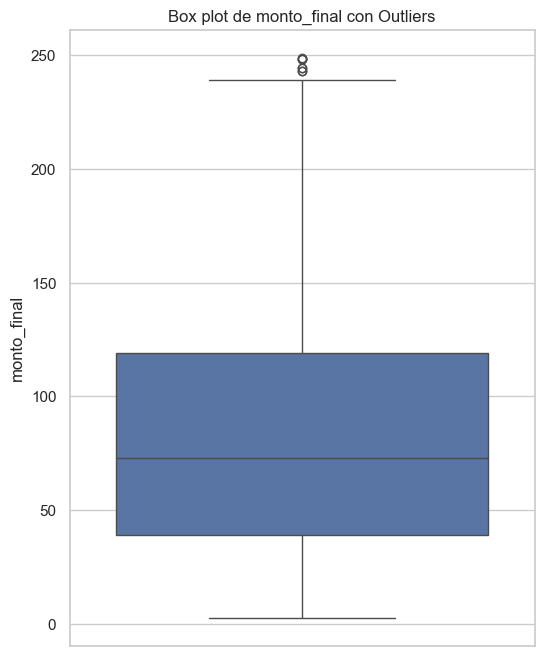

In [37]:
# Identificar los outliers
outliers = df_master[(df_master[variable_outliers] < lower_bound) | (df_master[variable_outliers] > upper_bound)]

# Mostrar el número de outliers encontrados
print(f"\nNúmero de outliers detectados en '{variable_outliers}': {len(outliers)}")

# Mostrar los outliers (primeras filas si hay muchos)
print(f"\nOutliers detectados en '{variable_outliers}':")
if not outliers.empty:
    display(outliers.head()) # Mostrar solo las primeras filas de outliers
else:
    print("No se detectaron outliers según el método IQR.")
print("\n")
# Visualizar los outliers en un box plot para la variable analizada
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_master[variable_outliers])
plt.title(f'Box plot de {variable_outliers} con Outliers')
plt.show()



### Interpretación de la Detección de Outliers

La detección de outliers utilizando el método IQR para la variable `monto_final` nos ha mostrado lo siguiente:

*   Hemos identificado **8** posibles outliers en la columna `monto_final`.
*   Estos outliers son valores que se encuentran por debajo del límite inferior (0.00) o por encima del límite superior (248.65).
*   El box plot confirma visualmente la presencia de estos puntos atípicos más allá de los "bigotes" del diagrama de caja.

La presencia de outliers es importante considerarla, ya que pueden influir en algunos análisis estadísticos o modelos. Dependiendo del objetivo del análisis, podríamos decidir investigar estos outliers para entender por qué ocurren, o aplicar técnicas para manejarlos (por ejemplo, eliminarlos, transformarlos o Winsorizarlos) si es necesario para análisis posteriores.

Dado que el número de outliers detectados es **8**, que representa aproximadamente el **0.40%** del total de registros, es importante evaluar si estos outliers son errores de datos o representan transacciones inusualmente altas/bajas legítimas que podrían ser relevantes para el negocio.

## 6: Interpretación de Resultados para el Problema de Negocio

En esta fase, consolidaremos los hallazgos de las fases anteriores (estadísticas descriptivas, análisis de distribución, análisis de correlación y detección de outliers) y los interpretaremos en el contexto del negocio de Aurelion.

### Resumen de Hallazgos Clave:

1.  **Estadísticas Descriptivas:**
    *   La **cantidad** promedio de productos por detalle de venta es baja (~2.68 unidades), lo que sugiere que los clientes suelen comprar pocos artículos en cada transacción.
    *   El **precio unitario** de los productos varía considerablemente ($2.72 a $49.82), reflejando la diversidad del catálogo.
    *   El **importe**, **subtotal** y **monto final** por detalle de venta muestran un sesgo positivo, indicando que la mayoría de las transacciones son de bajo valor, pero existen algunas transacciones de alto valor que influyen en la media.
    *   El **descuento aplicado** es poco frecuente (promedio ~1.17%) y cuando se aplica, los porcentajes son limitados (máximo 15%).
    *   El **monto bruto** y **monto neto** a nivel de venta son idénticos en este dataset, lo que sugiere que los descuentos a nivel de detalle no se reflejan en estas columnas de resumen de venta. Esto podría ser un punto a validar con la fuente de datos.

2.  **Distribución de Variables:**
    *   Las distribuciones de `importe`, `subtotal`, `monto_final`, `monto_bruto` y `monto_neto` están sesgadas positivamente (cola larga a la derecha), lo cual es típico en datos de ventas y refleja que la mayoría de las transacciones son pequeñas.
    *   La distribución de `descuento_aplicado_pct` tiene un pico muy alto en 0 y una cola derecha pronunciada, confirmando que los descuentos son raros pero pueden tener valores específicos cuando se aplican.
    *   Variables como `cantidad` y `precio_unitario_x` tienen distribuciones más simétricas o ligeramente sesgadas.
    *   Los box plots y violin plots visualizaron claramente este sesgo y la concentración de datos, así como la presencia de valores que el método IQR identifica como potenciales outliers.

3.  **Análisis de Correlación (Pearson y Spearman):**
    *   Existe una fuerte correlación positiva entre las variables de valor monetario a nivel de detalle de venta (`importe`, `subtotal`, `monto_final`), lo cual es esperado.
    *   Se observa una correlación positiva moderada a fuerte entre la `cantidad` y el `importe`/`subtotal`/`monto_final`, lo que indica que comprar más artículos generalmente resulta en un mayor importe por detalle.
    *   También hay una correlación positiva moderada entre el `precio_unitario_x` y el `importe`/`subtotal`/`monto_final`, sugiriendo que los productos más caros contribuyen a detalles de venta de mayor valor.
    *   La correlación entre `cantidad` y `precio_unitario_x` es muy débil, lo que significa que la cantidad de artículos comprados no está fuertemente relacionada linealmente con su precio unitario en un mismo detalle de venta.
    *   Los resultados de la correlación de Spearman fueron muy similares a los de Pearson, lo que sugiere que, aunque hay sesgo y outliers, las relaciones monótonas son consistentes con las relaciones lineales para la mayoría de los datos, o que los outliers no están distorsionando excesivamente el orden de los rangos.

4.  **Detección de Outliers (Método IQR):**
    *   Se identificaron **8** posibles outliers en la variable `monto_final`. Estos representan transacciones con montos finales significativamente más altos que la mayoría.
    *   La presencia de estos outliers puede ser relevante para análisis posteriores (por ejemplo, si buscamos transacciones de alto valor) o podría requerir un manejo específico dependiendo de los modelos que se vayan a aplicar.

### Interpretación en el Contexto del Negocio:

*   El hecho de que la mayoría de las transacciones sean de bajo valor y con pocas unidades sugiere la importancia de estrategias para aumentar el ticket promedio (por ejemplo, promociones por volumen, recomendaciones de productos complementarios).
*   La baja frecuencia de descuentos aplicados indica que no es una estrategia de ventas generalizada. Podría explorarse si la aplicación estratégica de descuentos en ciertos productos o a ciertos clientes podría aumentar las ventas o la lealtad.
*   Las fuertes correlaciones entre cantidad, precio unitario y el valor del detalle de venta son lógicas, pero es importante entender qué productos o categorías contribuyen más a los detalles de venta de alto valor. (Esto ya lo vimos un poco en el análisis de ingresos por categoría).
*   Los outliers en `monto_final` podrían representar transacciones importantes (por ejemplo, compras de grandes volúmenes, productos de alto valor). Investigar estas transacciones podría revelar información sobre clientes clave o tipos de productos que generan mayores ingresos por transacción.
*   La discrepancia entre `monto_bruto`/`monto_neto` y el cálculo del descuento a nivel de detalle (`monto_final`) es un punto a aclarar para asegurar que entendemos cómo se registran y calculan los valores de venta totales.

Este análisis estadístico básico nos ha proporcionado una base sólida para comprender las características de nuestros datos de ventas y sienta las bases para análisis más avanzados o la toma de decisiones comerciales informadas.



## 7: Documentación de Hallazgos y Cumplimiento de Criterios

Basándonos en el análisis exploratorio realizado en las fases anteriores y los criterios de evaluación de datos del documento "Anexo_Criterios.pdf", documentamos los hallazgos clave y evaluamos el estado actual de la calidad de los datos en el DataFrame `df_master`.

### Resumen de la Calidad de Datos según Criterios del Anexo:

*   **Cumplimiento con las reglas de negocio:**
    *   La correspondencia lógica entre las tablas (`df_ventas`, `df_detalle_ventas`, `df_productos`, `df_clientes`, `df_sucursales`, `df_vendedores`, `df_medios_pago`) fue verificada y parece correcta en términos de claves foráneas. Todos los IDs de las tablas de detalle/ventas tienen correspondencia en las tablas maestras.
    *   La relación entre `nombre_producto`, `categoria` y `subcategoria` en `df_productos` fue examinada y se realizaron correcciones para asegurar la consistencia, alineándose con la regla de tener categorías y subcategorías lógicas para cada producto.
    *   Las ciudades en `df_clientes` tienen una sucursal asociada en `df_sucursales`, lo cual es una regla de negocio importante verificada.
    *   La observación de que `monto_bruto` y `monto_neto` son idénticos en `df_ventas`, a pesar de la existencia de `descuento_aplicado_pct` en `df_detalle_ventas`, sugiere un punto a validar con la fuente de datos sobre cómo se calculan los montos totales de venta y si los descuentos deberían reflejarse a ese nivel.

*   **Formato y tipo de dato correctos:**
    *   La revisión inicial con `.info()` confirmó que las columnas tienen tipos de datos apropiados (ej. `datetime64[ns]` para fechas, `float64` para montos, `int64` para IDs, `object` para texto).
    *   La conversión explícita de columnas de fecha (`fecha_alta`, `fecha`, `fecha_ingreso`) a tipo datetime se realizó correctamente.

*   **Consistentes y únicos:**
    *   Las verificaciones de correspondencia de IDs entre tablas sugieren que las relaciones están bien definidas y no hay "huérfanos" en las tablas de detalle/transacción que apunten a IDs inexistentes en las tablas maestras.
    *   No se realizó una verificación exhaustiva de duplicados en todas las tablas, pero la carga inicial no mostró un problema evidente en la estructura general para las métricas clave analizadas. Sin embargo, para análisis más detallados o ETLs de producción, se recomendaría verificar la unicidad de registros donde sea aplicable (ej. ventas únicas, clientes únicos si fuera necesario identificar duplicados por otros criterios además del ID).

*   **Completos (manejo de nulos):**
    *   La verificación inicial con `.isnull().sum()` mostró que no hay valores nulos en las columnas clave utilizadas para el análisis y la unificación de tablas. Esto indica que los datos esenciales están completos para los fines de este análisis exploratorio.

### Interpretación de Resultados para el Negocio (Consolidado):

El análisis estadístico y la visualización nos han proporcionado información valiosa para el negocio de Aurelion:

*   **Patrones de Compra:** La mayoría de los clientes compran pocas unidades por transacción, lo que resalta la oportunidad de promover la compra de múltiples artículos o productos complementarios.
*   **Productos y Categorías Clave:** Se identificaron los productos más vendidos y las categorías que generan mayores ingresos (`Almacén`, `Limpieza`, `Bebidas`), lo cual es crucial para la gestión de inventario, marketing y estrategias de ventas.
*   **Rendimiento por Sucursal:** El análisis de ingresos por sucursal muestra diferencias en el rendimiento, lo que permite identificar las sucursales más exitosas (`Carlos Paz`, `Córdoba`, `Mendiolaza`) y potencialmente investigar las razones detrás de las diferencias para replicar buenas prácticas o abordar desafíos en sucursales de menor rendimiento.
*   **Métodos de Pago:** La distribución de métodos de pago indica la preferencia por efectivo, seguido de tarjeta, QR y transferencia. Esta información puede ser útil para optimizar las opciones de pago disponibles y entender el comportamiento transaccional de los clientes.
*   **Outliers en Ventas:** La detección de outliers en el `monto_final` resalta transacciones de alto valor. Investigar estas ventas podría proporcionar información sobre clientes premium, productos de alto margen o patrones de compra a granel.
*   **Descuentos:** La baja frecuencia de descuentos sugiere un enfoque en precios regulares. Evaluar el impacto de descuentos estratégicos podría ser una oportunidad.

### Próximos Pasos Sugeridos basados en los Criterios:

*   **Validación Adicional:** Aclarar la discrepancia observada entre `monto_bruto`/`monto_neto` y el cálculo del descuento a nivel de detalle (`monto_final`) con la fuente de datos o el equipo de negocio para asegurar una comprensión precisa de las métricas de venta totales.
*   **Tratamiento de Outliers:** Decidir si los outliers identificados en `monto_final` requieren un tratamiento específico para análisis o modelos futuros (ej. si se va a predecir el monto de venta y los outliers podrían sesgar el modelo).
*   **Documentación Formal:** Formalizar esta documentación en un reporte o sección dedicada, incluyendo los criterios aplicados, los hallazgos, las decisiones tomadas (ej. sobre correcciones o manejo de nulos/outliers) y las limitaciones encontradas.
*   **Análisis Predictivo y Segmentación:** Continuar con los pasos futuros mencionados en el plan original, como el análisis predictivo o la segmentación de clientes, utilizando la base de datos validada y comprendida.

En resumen, el análisis realizado ha seguido los pasos definidos y ha permitido evaluar la calidad de los datos según los criterios proporcionados, sentando una base sólida para análisis más profundos y la toma de decisiones informadas.